
AdaBoost
Mean Squared Error: 264.48
R-squared: 0.86


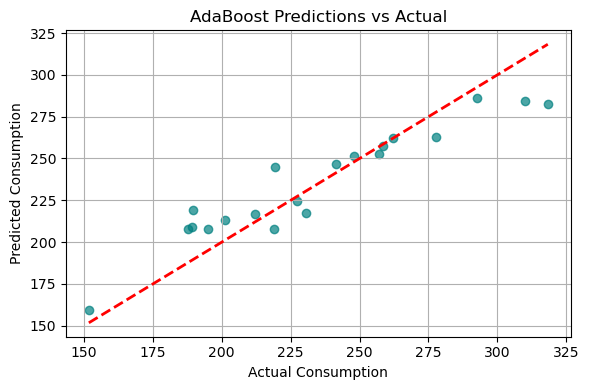


Gradient Boosting
Mean Squared Error: 169.97
R-squared: 0.91


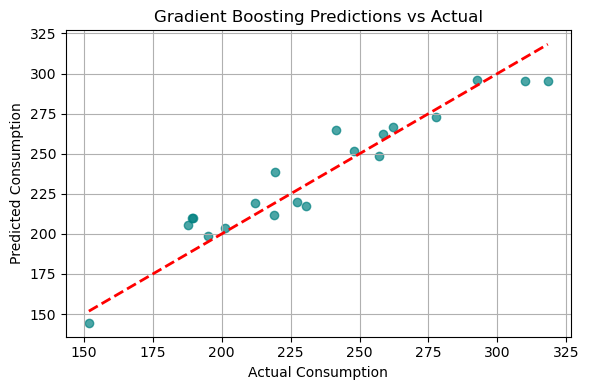


XGBoost
Mean Squared Error: 189.34
R-squared: 0.90


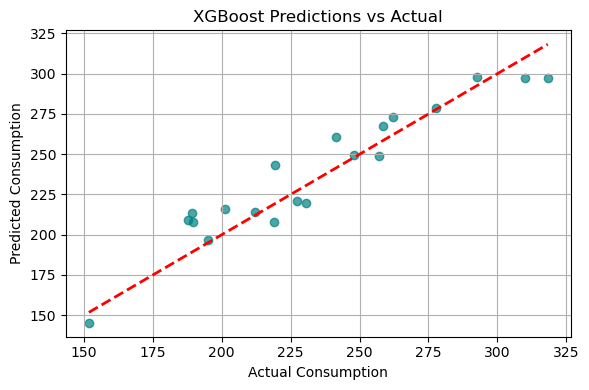


Stacking
Mean Squared Error: 151.60
R-squared: 0.92


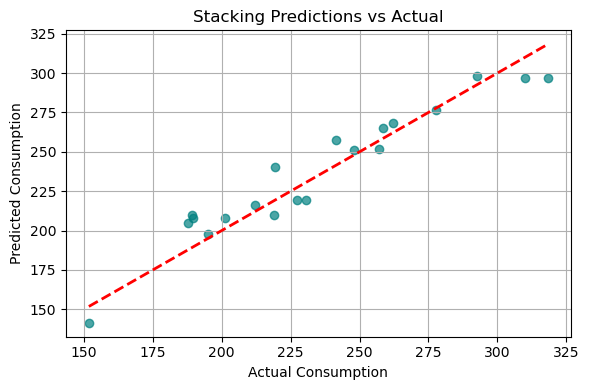

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Regressors
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Sample Dataset
# -----------------------------
# Simulate electricity consumption based on temperature, humidity, gas usage
np.random.seed(42)
n = 100
df = pd.DataFrame({
    'Temperature': np.random.uniform(15, 40, n),
    'Humidity': np.random.uniform(30, 90, n),
    'Gas_Usage': np.random.uniform(50, 150, n)
})
# Simulated target variable
df['Electricity_Consumption'] = (df['Temperature'] * 3 +
                                 df['Humidity'] * 0.5 +
                                 df['Gas_Usage'] * 1.2 +
                                 np.random.normal(0, 10, n))

# -----------------------------
# Step 2: Feature/Target Split
# -----------------------------
X = df[['Temperature', 'Humidity', 'Gas_Usage']]
y = df['Electricity_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# -----------------------------
# Step 3: Train Models
# -----------------------------
models = {
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=1),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=1, verbosity=0),
    "Stacking": StackingRegressor(
        estimators=[
            ('gb', GradientBoostingRegressor(n_estimators=50)),
            ('xgb', XGBRegressor(n_estimators=50, verbosity=0))
        ],
        final_estimator=LinearRegression()
    )
}

results = {}

# -----------------------------
# Step 4: Train and Evaluate
# -----------------------------
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"\n{name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

    # Plot Predictions
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{name} Predictions vs Actual")
    plt.xlabel("Actual Consumption")
    plt.ylabel("Predicted Consumption")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Sample dataset
data = {
    'Water_Usage': [100, 150, 200, 250, 300],
    'Gas_Usage': [50, 70, 90, 110, 130],
    'Electricity_Consumption': [200, 250, 300, 350, 400]
}

df = pd.DataFrame(data)

# Feature and target split
X = df[['Water_Usage', 'Gas_Usage']]
y = df['Electricity_Consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 1. AdaBoost Regressor
# -------------------------
model = AdaBoostRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred_ada = model.predict(X_test)
print("AdaBoost Predictions:", y_pred_ada)

# -------------------------
# 2. Gradient Boosting Regressor
# -------------------------
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred_gb = model.predict(X_test)
print("GradientBoosting Predictions:", y_pred_gb)

# -------------------------
# 3. XGBoost Regressor
# -------------------------
model = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
print("XGBoost Predictions:", y_pred_xgb)

# -------------------------
# 4. Stacking Regressor
# -------------------------
model = StackingRegressor(
    estimators=[
        ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=50, random_state=42, objective='reg:squarederror'))
    ],
    final_estimator=LinearRegression(),
    cv=3
    
)
model.fit(X_train, y_train)
y_pred_stack = model.predict(X_test)
print("Stacking Regressor Predictions:", y_pred_stack)

AdaBoost Predictions: [200.]
GradientBoosting Predictions: [200.00298816]
XGBoost Predictions: [200.66608]
Stacking Regressor Predictions: [25.03364442]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# ✅ Step 1: Larger synthetic dataset
data = {
    'Water_Usage': list(range(100, 600, 25)),  # 20 samples
    'Gas_Usage': list(range(50, 150, 5)),
    'Electricity_Consumption': list(range(200, 400, 10))
}

df = pd.DataFrame(data)

# ✅ Step 2: Feature and target split
X = df[['Water_Usage', 'Gas_Usage']]
y = df['Electricity_Consumption']

# ✅ Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 4: Define and evaluate each model separately

# AdaBoost
model_ada = AdaBoostRegressor(n_estimators=50, random_state=42)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)
print("AdaBoost MSE:", mean_squared_error(y_test, y_pred_ada))

# Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))

# XGBoost
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))

# Stacking
model_stack = StackingRegressor(
    estimators=[
        ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=50, random_state=42, objective='reg:squarederror'))
    ],
    final_estimator=LinearRegression(),
    cv=3  # adjusted to avoid ValueError
)
model_stack.fit(X_train, y_train)
y_pred_stack = model_stack.predict(X_test)
print("Stacking MSE:", mean_squared_error(y_test, y_pred_stack))


AdaBoost MSE: 230.55555555555574
Gradient Boosting MSE: 175.0616240485819
XGBoost MSE: 181.77393860416487
Stacking MSE: 223.8596541523936


AdaBoost MSE: 230.55555555555574
Gradient Boosting MSE: 175.0616240485819
XGBoost MSE: 181.77393860416487
Stacking MSE: 223.8596541523936


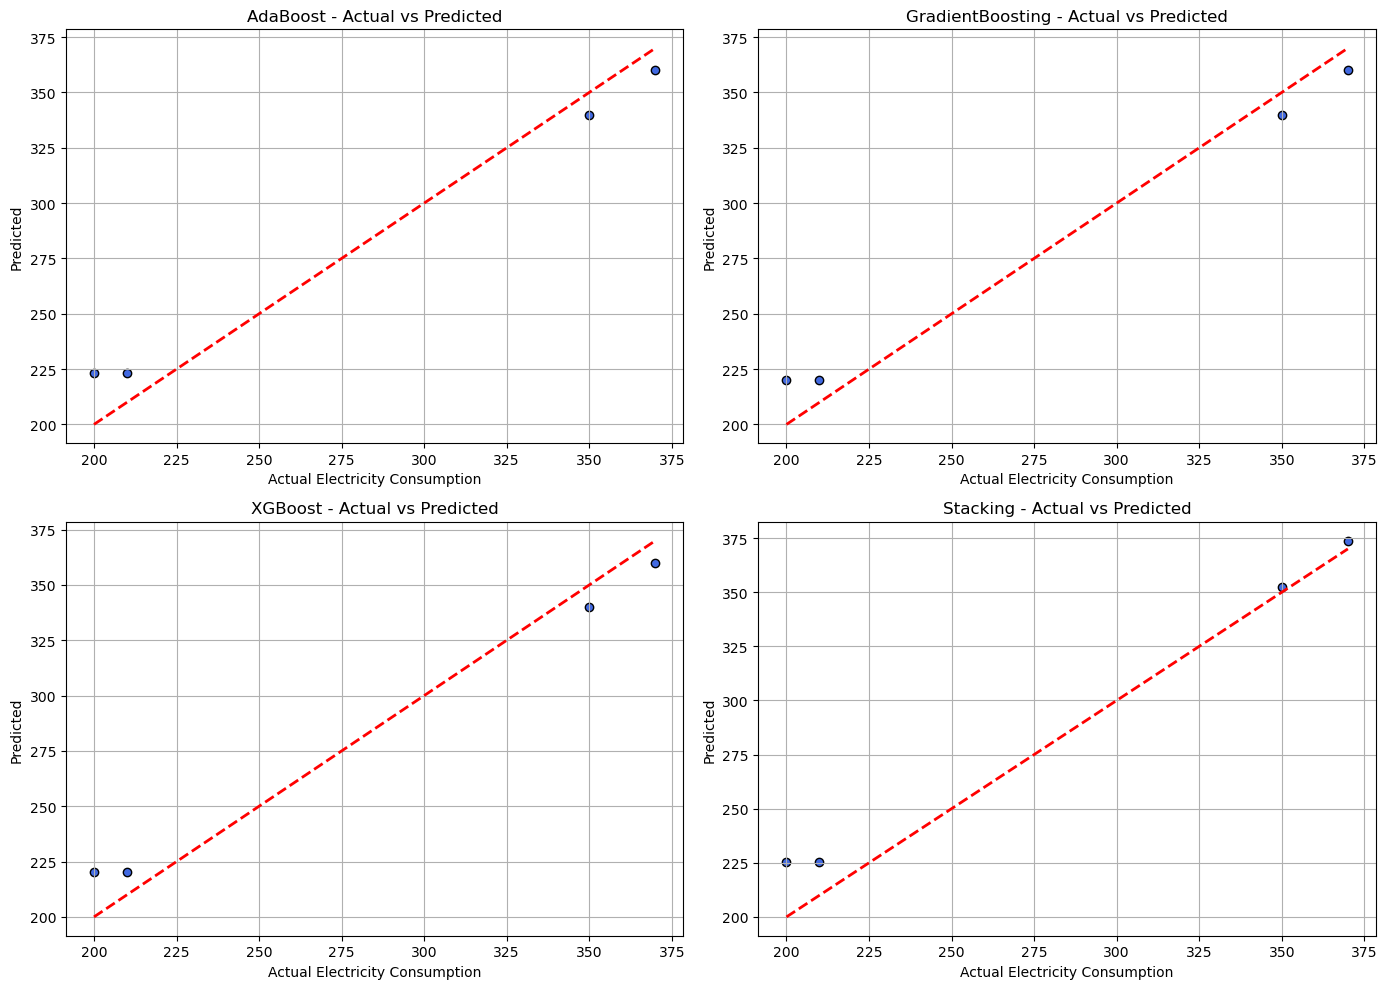

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

 #✅ Step 1: Synthetic dataset
data = {
    'Water_Usage': list(range(100, 600, 25)),  # 20 samples
    'Gas_Usage': list(range(50, 150, 5)),
    'Electricity_Consumption': list(range(200, 400, 10))
}



df = pd.DataFrame(data)

# ✅ Step 2: Feature and target split
X = df[['Water_Usage', 'Gas_Usage']]
y = df['Electricity_Consumption']

# ✅ Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ✅ Step 4: Define and evaluate each model
results = {}

# AdaBoost
model_ada = AdaBoostRegressor(n_estimators=50, random_state=42)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)
results['AdaBoost'] = (y_test.values, y_pred_ada)
print("AdaBoost MSE:", mean_squared_error(y_test, y_pred_ada))

# Gradient Boosting
model_gb = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
results['GradientBoosting'] = (y_test.values, y_pred_gb)
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))

# XGBoost
model_xgb = XGBRegressor(
    n_estimators=100, learning_rate=0.1, objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
results['XGBoost'] = (y_test.values, y_pred_xgb)
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))

# Stacking
model_stack = StackingRegressor(
    estimators=[
        ('gb', GradientBoostingRegressor(
            n_estimators=50, random_state=42)),
        ('xgb', XGBRegressor(
            n_estimators=50, random_state=42, objective='reg:squarederror'))
    ],
    final_estimator=LinearRegression(),
    cv=3
)
model_stack.fit(X_train, y_train)
y_pred_stack = model_stack.predict(X_test)
results['Stacking'] = (y_test.values, y_pred_stack)
print("Stacking MSE:", mean_squared_error(y_test, y_pred_stack))

# ✅ Step 5: Plot actual vs predicted for each model
plt.figure(figsize=(14, 10))

for i, (model_name, (actual, predicted)) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(actual, predicted, color='royalblue', edgecolors='black')
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)],
             'r--', lw=2)  # 45-degree line
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual Electricity Consumption')
    plt.ylabel('Predicted')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# How to Connect to the Database -- Please don't run -you have the enter the db server name and pwd -Pick up your own and this is the template how to directly connect to the DB
import pandas as pd
import numpy as np
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ------------------------------
# Step 1: Connect to SQL Server
# ------------------------------
conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=your_server_name;"
    "DATABASE=your_database_name;"
    "UID=your_username;"
    "PWD=your_password"
)
conn = pyodbc.connect(conn_str)

# ------------------------------
# Step 2: Load Data from SQL
# ------------------------------
query = """
SELECT Temperature, Humidity, Gas_Usage, Electricity_Consumption
FROM ElectricityData
"""
df = pd.read_sql(query, conn)

# Close connection after reading
conn.close()

# ------------------------------
# Step 3: Feature/Target Split
# ------------------------------
X = df[['Temperature', 'Humidity', 'Gas_Usage']]
y = df['Electricity_Consumption']

# ------------------------------
# Step 4: Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# Step 5: Train Boosting Models
# ------------------------------

# 1. AdaBoost
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

# 2. Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

# 3. XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# 4. Stacking
stack = StackingRegressor(
    estimators=[
        ('gb', gbr),
        ('ada', ada),
        ('xgb', xgb)
    ],
    final_estimator=LinearRegression()
)
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)

# ------------------------------
# Step 6: Evaluation
# ------------------------------
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print("AdaBoost RMSE:", rmse(y_test, ada_pred))
print("Gradient Boosting RMSE:", rmse(y_test, gbr_pred))
print("XGBoost RMSE:", rmse(y_test, xgb_pred))
print("Stacking Regressor RMSE:", rmse(y_test, stack_pred))
